In [1]:
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [3]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from scipy import stats
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
import pickle
import barcodes
from cka import cka
from msid import msid_score
from svcca import svcca

def msid_score_n(a, b, n):
    total = 0.0
    for _ in range(n):
        total += msid_score(a, b)
    return total / n

In [5]:
def create_ring(N_points, R, noise=0):
    arr = np.zeros((N_points, 2))

    for i in range(N_points):
        theta = 2 * np.pi * i / N_points
        d = (np.array([np.cos(theta), np.sin(theta)])
                 + np.random.multivariate_normal(np.zeros(2), noise * np.eye(2))) * R

        arr[i] = d

    return arr

In [6]:
def create_set_of_rings(N_large, N_total, noise = 0):
    A = []

    for i in range(N_total):
        np.random.seed(i)
        if i < N_large:
            R = 1
        else:
            R = (i - N_large + 1) / (N_total - N_large + 1)
            idx = (i - N_large)
            
            if idx % 2 == 0:
                R = 1 + 0.25 * (2 + idx) / 2 
            else:
                R = 1 - 0.25 * (2+ idx - 1) / 2
            
        A.append(create_ring(100, R=R, noise=noise))
        
    A_mod = np.concatenate(A)
    
    return A_mod

In [7]:
N_rings = 5
A_base = create_set_of_rings(1, N_rings)

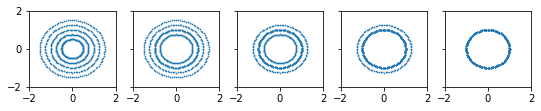

In [8]:
ALL = list(range(2, N_rings + 1))

fig, ax = plt.subplots(1, len(ALL) + 1)
fig.set_size_inches(9, 1.4)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
    else:
        A = create_set_of_rings(k, N_rings)

    ax[idx].scatter(x = A[:,0], y = A[:,1], s = 0.5)
    ax[idx].set_xlim(-2, 2)
    ax[idx].set_ylim(-2, 2)
    
for ax in fig.get_axes():
    ax.label_outer()

row, col 0 0
row, col 0 1
row, col 0 2
row, col 1 0
row, col 1 1


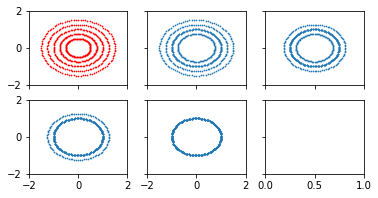

In [9]:
COLS = int(np.ceil((len(ALL) + 1)/2))
fig, ax = plt.subplots(2, COLS)
fig.set_size_inches(6, 3)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
        color = 'r'
    else:
        A = create_set_of_rings(k, N_rings)
        color = '#1f77b4'

    row = idx // COLS
    col = idx % COLS
    
    print('row, col', row, col)
        
    ax[row, col].scatter(x = A[:,0], y = A[:,1], s = 0.5, color = color)
    ax[row, col].set_xlim(-2, 2)
    ax[row, col].set_ylim(-2, 2)
    
for ax in fig.get_axes():
    ax.label_outer()

In [10]:
%%time

for i, k in enumerate(range(1, N_rings + 1)):
    A_mod = create_set_of_rings(k, N_rings)
    
    barc = barcodes.calc_embed_dist(A_base, A_mod, norm = 'quantile')
    barc = barcodes.calc_embed_dist(A_mod, A_base, norm = 'quantile')

CPU times: user 3min 24s, sys: 13.9 s, total: 3min 38s
Wall time: 2min 24s


In [11]:
%%time

for i, k in enumerate(range(1, N_rings + 1)):
    A_mod = create_set_of_rings(k, N_rings)
    cka(A_base, A_mod)

CPU times: user 21.9 s, sys: 1.91 s, total: 23.8 s
Wall time: 669 ms


In [14]:
%%time

for i, k in enumerate(range(1, N_rings + 1)):
    A_mod = create_set_of_rings(k, N_rings)
    msid_score_n(A_base, A_mod, 100)

CPU times: user 1min 31s, sys: 99.2 ms, total: 1min 31s
Wall time: 1min 31s


In [13]:
%%time

for i, k in enumerate(range(1, N_rings + 1)):
    A_mod = create_set_of_rings(k, N_rings)
    svcca(A_base.T, A_mod.T)

CPU times: user 18.4 s, sys: 1.85 s, total: 20.2 s
Wall time: 588 ms
